<a href="https://colab.research.google.com/github/ylorenzi/Bootcamp-Alura-Data-Science/blob/main/Projetos/Modulo1/Projeto_Modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Formato dos números nos gráficos
pd.options.display.float_format = "{:.0f}".format

# O presente projeto tem como objetivos investigar as estatísticas de óbitos do SUS para todas as Unidades da Federação brasileiras.

# Primeiramente importamos a base de dados de óbitos do DataSUS

In [2]:
df = pd.read_csv("https://github.com/ylorenzi/Bootcamp-Alura-Data-Science/raw/main/Projetos/Modulo1/Dados/obitos_mes.csv",sep=";",encoding="ISO8859-1",skiprows=3,skipfooter=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df = df.set_index("Unidade da Federação")

# Na base de dados existem colunas com formato object. 
# A seguir duas formas de identificar quais são essas colunas:

Forma 1

In [4]:
df_num = df.select_dtypes(exclude=[np.number])
df_num.columns

Index(['2009/Set'], dtype='object')

Forma 2

In [5]:
df.loc[:,df.dtypes == object].columns

Index(['2009/Set'], dtype='object')

# Convertemos a coluna problemática 2009/Set para o formato numeric:

In [6]:
df['2009/Set'] = pd.to_numeric(df['2009/Set'], errors='coerce')

In [7]:
#Ordenando o dataframe pelo Total
df = df.sort_values(by="Total",axis=0,ascending=False)

In [8]:
#Dropamos a coluna total para plotar gráficos
df = df.drop("Total",axis=1)


In [9]:
df.head(3)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,4762,6849,7525,7818,9152,9104,10110,9580,9161,9198,7603,8121,7746,7670,8570,8023,8678,8945,9865,9962,9457,9217,8682,8324,9340,8571,9013,9261,8809,9589,9792,9620,10115,9065,9741,9166,9518,8896,9077,8774,...,9893,10415,9404,9868,9843,10349,11216,11286,10807,10327,10202,9929,10105,11049,9701,10049,10125,10790,11009,12059,11500,10963,10777,9833,10005,11045,10091,10595,10479,12136,13347,14902,13495,12911,12823,11517,11704,13471,13087,16850
31 Minas Gerais,2251,3396,3729,3437,3638,4388,4240,4196,4025,3972,3605,3462,3893,3667,3927,3690,4030,3950,4168,4329,3929,3855,4054,3683,4093,3776,3764,3797,3980,4179,4349,4221,4063,4062,4225,3940,4177,3932,4010,3913,...,4573,4674,4238,4638,4746,4751,5050,4977,5004,4905,4820,4390,4543,4872,4474,4759,4759,5152,5092,5502,5451,5141,5173,4614,4578,5036,4569,4593,4346,4527,4744,5517,5964,5907,6113,5460,5340,6083,5811,7331
33 Rio de Janeiro,1132,1423,2481,2218,2792,2692,2645,2784,2873,2742,1999,2475,2393,2457,2439,2210,2513,2488,2872,2921,2644,2485,2896,2403,2747,2891,2941,2955,3019,2946,3182,3350,3129,3253,3002,3233,3254,2981,3298,2889,...,3519,3829,3658,3975,3792,4249,4092,4530,4161,4042,3895,3709,3646,4257,3643,4096,3785,4446,4539,4561,4287,4092,4191,3918,3854,4323,3675,3858,3848,5655,5647,5982,5229,5153,4623,5137,5370,5614,4852,6081


# Ao plotar todas Unidades da Federação num único gráfico a visualização e interpretação ficam comprometidas!

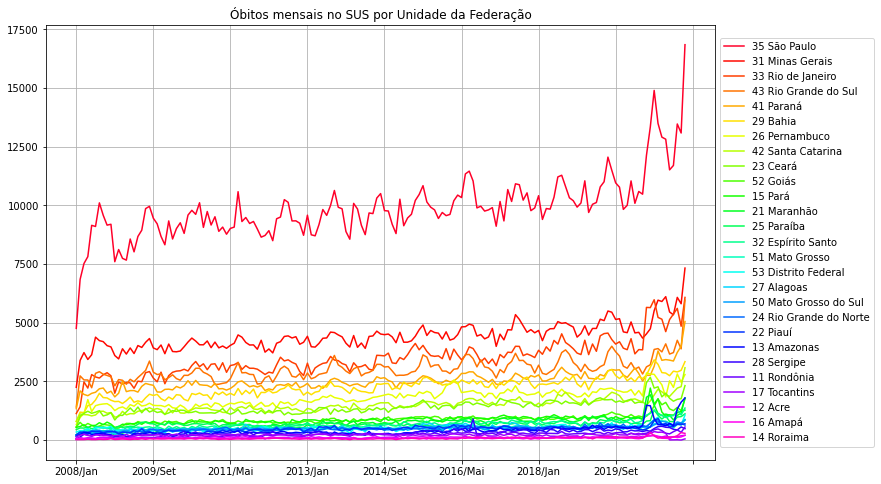

In [10]:
ax = df.T.plot(grid=True,figsize=(12,8),colormap="gist_rainbow")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Óbitos mensais no SUS por Unidade da Federação")
plt.show()

# Uma alternativa para lidar com esse problema é utilizar o subplots para que possamos analisar cada UF separadamente.

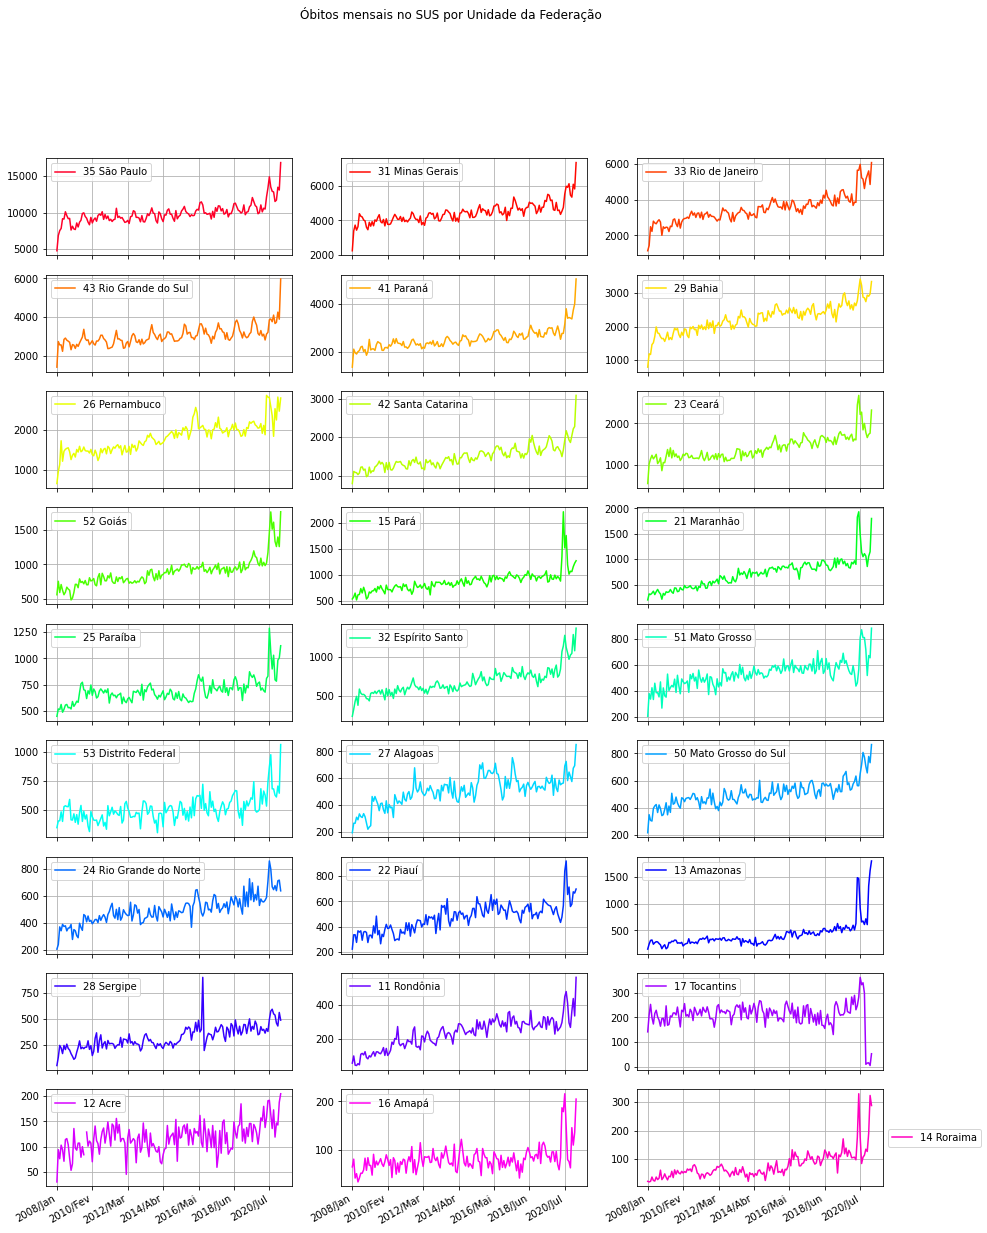

In [11]:
df.T.plot(grid=True,figsize=(15,21),colormap="gist_rainbow",subplots=True,layout=(9,3),title="Óbitos mensais no SUS por Unidade da Federação")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Existem dois pontos que se destacam na maioria dos gráficos:


*   um pico de crescimento logo nos primeiros meses das séries de tempo
*   dois picos de óbitos ao final das séries



O pico inicial provavelmente é consequência de um problema com a base da dados no início da série. Por isso, a partir daqui iremos excluir da amostra os dois primeiros meses.

Os dois picos no final da série são resultantes da primeira e segunda onda da COVID-19.

# Nossas análises iniciais possuem uma limitação. As UFs possuem populações distintas. 
Para fazermos comparações entre UFs precisamos ter uma médida da quantidade de óbitos relativa à população.

# O próprio DataSUS fornece uma base da dados com a população ano a ano de cada UF.


In [12]:
pop = pd.read_csv("https://github.com/ylorenzi/Bootcamp-Alura-Data-Science/raw/main/Projetos/Modulo1/Dados/PopBrasil2008-2019.csv",sep=";",encoding="ISO8859-1",skiprows=3,skipfooter=12,thousands=".")
pop = pop.set_index("Unidade da Federação")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [13]:
pop = pop.loc[:,"2008":"2019"]
pop.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,
11 Rondônia,1493566,1503928,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225
12 Acre,680073,691132,732793,746386,758786,776463,790101,803513,816687,829619,869265,881935
13 Amazonas,3341096,3393369,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597
14 Roraima,412783,421499,451227,460165,469524,488072,496936,505665,514229,522636,576568,605761
15 Pará,7321493,7457119,7588078,7688593,7822205,7999729,8104880,8206923,8305359,8366628,8513497,8602865


# Encontramos outros problema, pois os dados de população são anuais, enquanto os de óbitos são mensais.
# A forma escolhida para lidar com esse problema será a mais simplista possível. Iremos assumir que a população se manteve constante durante todos meses do ano.

# Existe um outro problema que é que os dados de população vão apenas até 2019. Para evitar ter que excluir 2020 e 2021 da amostra usaremos outra hipótese forte.
# A hipótese é que a população de 2020 e 2021 foi igual a de 2019. Embora não seja nem de longe a melhor aproximação foi a forma encontrada para poderem serem feitas análises sobre os efeitos da COVID-19.



Criamos um array que repete 12 vezes o índice de cada coluna.
A coluna 11 (representa o ano de 2019) é repetida 15 vezes adicionais para fazer o papel de 2020 e os 3 meses iniciais de 2021.

In [14]:
np.append(np.arange(len(pop.T)).repeat(12),15*[11])

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11])

In [15]:
pop = pop.iloc[:,np.append(np.arange(len(pop.T)).repeat(12),15*[11])]

In [16]:
pop.head()

,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,2011,2011,2011,2011,...,2017,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1493566,1493566,1493566,1493566,1493566,1493566,1493566,1493566,1493566,1493566,1493566,1493566,1503928,1503928,1503928,1503928,1503928,1503928,1503928,1503928,1503928,1503928,1503928,1503928,1560501,1560501,1560501,1560501,1560501,1560501,1560501,1560501,1560501,1560501,1560501,1560501,1576455,1576455,1576455,1576455,...,1805788,1757589,1757589,1757589,1757589,1757589,1757589,1757589,1757589,1757589,1757589,1757589,1757589,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225,1777225
12 Acre,680073,680073,680073,680073,680073,680073,680073,680073,680073,680073,680073,680073,691132,691132,691132,691132,691132,691132,691132,691132,691132,691132,691132,691132,732793,732793,732793,732793,732793,732793,732793,732793,732793,732793,732793,732793,746386,746386,746386,746386,...,829619,869265,869265,869265,869265,869265,869265,869265,869265,869265,869265,869265,869265,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935,881935
13 Amazonas,3341096,3341096,3341096,3341096,3341096,3341096,3341096,3341096,3341096,3341096,3341096,3341096,3393369,3393369,3393369,3393369,3393369,3393369,3393369,3393369,3393369,3393369,3393369,3393369,3480937,3480937,3480937,3480937,3480937,3480937,3480937,3480937,3480937,3480937,3480937,3480937,3538387,3538387,3538387,3538387,...,4063614,4080611,4080611,4080611,4080611,4080611,4080611,4080611,4080611,4080611,4080611,4080611,4080611,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597,4144597
14 Roraima,412783,412783,412783,412783,412783,412783,412783,412783,412783,412783,412783,412783,421499,421499,421499,421499,421499,421499,421499,421499,421499,421499,421499,421499,451227,451227,451227,451227,451227,451227,451227,451227,451227,451227,451227,451227,460165,460165,460165,460165,...,522636,576568,576568,576568,576568,576568,576568,576568,576568,576568,576568,576568,576568,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761,605761
15 Pará,7321493,7321493,7321493,7321493,7321493,7321493,7321493,7321493,7321493,7321493,7321493,7321493,7457119,7457119,7457119,7457119,7457119,7457119,7457119,7457119,7457119,7457119,7457119,7457119,7588078,7588078,7588078,7588078,7588078,7588078,7588078,7588078,7588078,7588078,7588078,7588078,7688593,7688593,7688593,7688593,...,8366628,8513497,8513497,8513497,8513497,8513497,8513497,8513497,8513497,8513497,8513497,8513497,8513497,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865,8602865


# Agora que o dataframe da população possui mesma dimensão que o dataframe dos óbitos podemos criar um novo dataframe de óbitos por 100.000 habitantes ao dividir o dataframe de óbitos pelos valores do dataframe da população.

In [17]:
pd.options.display.float_format = "{:.3f}".format
obitos = df.sort_index()/pop.values*100000
obitos.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,3.816,6.628,3.013,2.879,3.616,3.147,7.298,7.633,7.030,8.302,6.026,5.490,6.649,6.184,7.314,8.245,6.516,8.179,8.179,7.647,7.447,8.445,9.841,6.782,9.164,6.536,7.305,8.459,11.535,10.702,12.880,12.624,17.366,11.086,10.189,10.766,10.911,9.008,10.467,12.306,...,13.014,17.012,17.126,16.443,16.272,16.102,15.988,20.767,15.362,14.338,15.248,15.533,16.102,16.768,15.192,14.911,18.512,18.118,14.348,18.512,15.755,17.555,18.231,17.555,12.773,16.880,13.842,14.461,15.136,16.599,20.087,25.095,26.783,22.957,16.486,14.967,20.256,24.476,18.737,31.454
12 Acre,4.411,13.822,11.175,15.145,13.822,10.440,16.763,17.057,15.292,11.322,7.793,9.705,19.678,14.035,13.456,15.482,15.482,11.431,14.469,12.154,nan,18.665,14.614,16.061,14.602,9.552,15.693,19.241,15.284,14.465,11.599,15.557,17.740,18.696,14.602,17.058,19.963,16.747,13.532,19.427,...,12.777,14.725,9.778,10.469,11.159,10.929,17.141,14.725,13.460,16.106,16.566,21.282,12.769,15.307,12.132,15.647,13.606,16.555,16.555,12.473,16.328,15.647,14.400,11.906,14.400,17.802,17.235,20.410,15.647,17.915,21.657,21.770,18.482,15.421,19.616,13.493,16.668,16.214,21.317,23.244
13 Amazonas,4.460,7.273,9.338,9.578,7.183,8.081,8.620,8.500,7.602,6.824,4.699,6.076,6.807,4.568,5.275,8.075,7.868,8.782,8.546,9.371,9.283,7.662,7.868,7.633,7.929,5.975,6.809,7.211,7.412,9.854,7.297,8.044,7.900,7.469,8.130,7.182,8.761,9.665,9.383,10.089,...,9.917,10.709,9.974,12.057,11.518,13.062,13.135,11.910,11.910,11.322,12.572,11.444,12.155,13.753,11.919,15.128,12.836,13.753,11.026,13.270,12.522,14.380,13.101,13.319,11.823,12.546,14.356,12.233,15.176,35.806,35.347,22.101,15.852,16.238,14.694,17.251,14.646,32.090,38.991,43.334
14 Roraima,5.572,5.087,5.572,9.206,6.299,5.814,9.206,7.025,8.237,15.020,7.025,8.721,11.625,8.778,6.643,9.727,9.253,13.760,8.541,14.947,11.388,14.472,12.337,11.625,12.854,11.524,12.632,11.967,14.627,13.740,14.627,12.632,17.065,17.951,15.956,11.524,10.431,6.737,10.431,10.214,...,16.646,19.252,18.558,13.528,16.130,17.864,22.894,21.333,18.038,21.853,19.252,19.078,17.691,18.819,20.140,8.584,18.984,17.994,20.470,28.229,19.645,22.946,18.159,21.626,20.140,17.334,17.499,17.664,16.178,29.219,54.147,29.219,14.032,17.664,18.819,22.286,20.965,31.366,53.156,47.378
15 Pará,7.417,7.936,8.946,7.157,8.496,8.591,10.135,8.987,10.476,9.329,7.403,7.854,9.079,8.810,9.347,9.400,9.977,9.052,10.473,9.830,10.741,9.910,9.320,8.596,10.661,9.528,9.502,9.502,8.935,9.805,10.424,10.754,10.279,10.161,10.279,9.291,10.821,10.184,10.639,9.456,...,10.267,10.924,11.276,11.875,11.699,12.721,11.864,10.795,12.028,11.558,11.464,10.442,11.288,11.299,10.903,11.322,11.508,11.810,12.589,10.078,10.241,11.705,10.752,10.694,11.636,10.822,11.322,10.985,10.299,15.739,25.782,17.715,20.482,13.902,11.845,12.496,12.414,13.519,14.298,14.844


# Vamos refazer os gráficos anteriores com a base transformada (e excluindo os 2 primeiros meses).

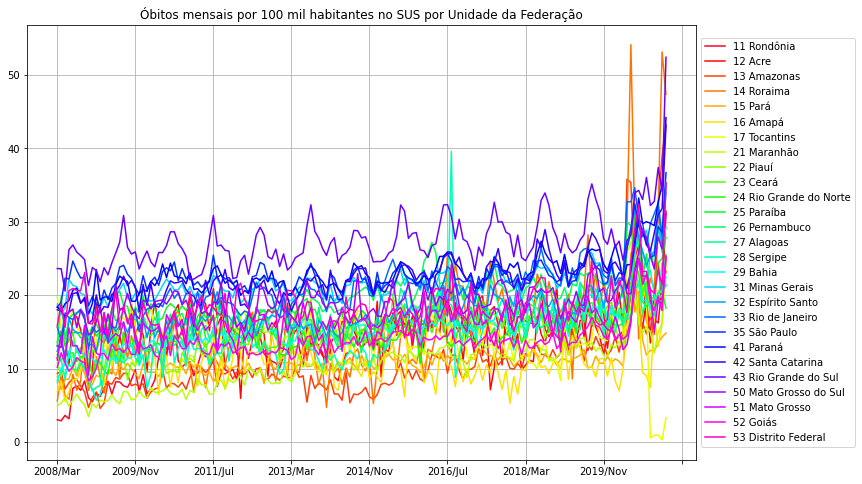

In [18]:
ax = obitos.iloc[:,2:].T.plot(grid=True,figsize=(12,8),colormap="gist_rainbow")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Óbitos mensais por 100 mil habitantes no SUS por Unidade da Federação")
plt.show()

# O gráfico com todas 27 UFs é ainda mais confuso agora! Novamente usaremos o recurso de plotar da UF separadamente.

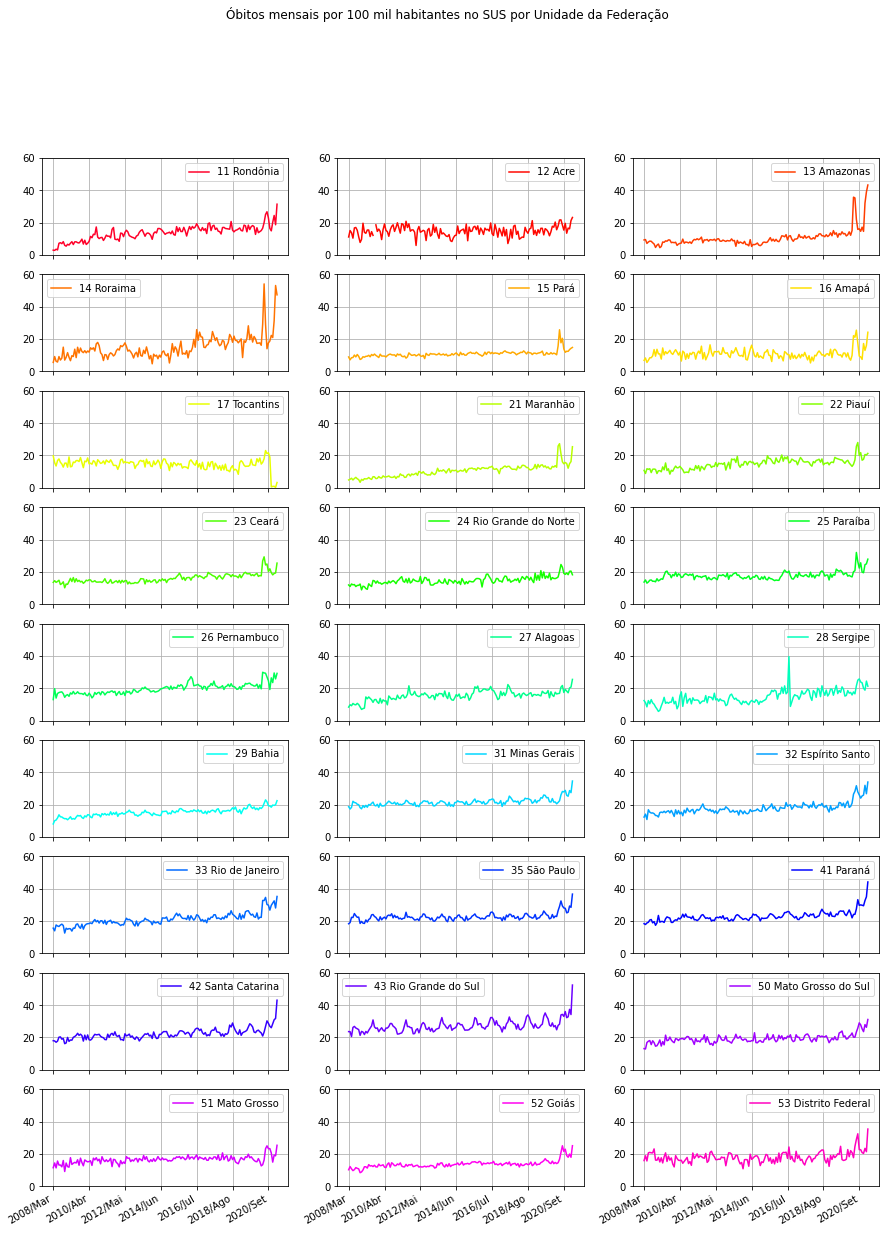

In [19]:
obitos.iloc[:,2:].T.plot(grid=True,figsize=(15,21),colormap="gist_rainbow",subplots=True,layout=(9,3),title="Óbitos mensais por 100 mil habitantes no SUS por Unidade da Federação",ylim=(0,60))
plt.show()

# A trajetória das curvas são muito similares entre si, mas agora é possível comparar as quantidades porque estão na mesma escala relativa.
# Enquanto a maioria das UFs de Sul, Sudeste e Centro Oeste se mantiveram ao longo do tempo muito próximas do patamar de 20 óbitos por 100 mil habitantes são algumas UFs do Norte e Nordeste que possuem os melhores números.

# A seguir uma tabela com as médias das UFs ao longo do período que deixa isso muito claro.

In [20]:
obitos.mean(axis=1).sort_values()

Unidade da Federação
21 Maranhão              10.388
13 Amazonas              10.532
15 Pará                  10.836
16 Amapá                 10.956
11 Rondônia              13.599
52 Goiás                 13.668
17 Tocantins             14.508
28 Sergipe               14.617
24 Rio Grande do Norte   14.691
12 Acre                  14.838
22 Piauí                 14.873
14 Roraima               14.980
29 Bahia                 15.147
27 Alagoas               15.433
23 Ceará                 15.931
51 Mato Grosso           16.354
25 Paraíba               17.669
32 Espírito Santo        17.766
53 Distrito Federal      17.978
50 Mato Grosso do Sul    19.245
26 Pernambuco            19.654
33 Rio de Janeiro        20.944
31 Minas Gerais          21.553
42 Santa Catarina        22.194
35 São Paulo             22.614
41 Paraná                22.937
43 Rio Grande do Sul     27.236
dtype: float64

# O resultado encontrado é curioso pois a região Norte e Nordeste é históricamente a menos desenvolvida economicamente. Seria esperado que menos recursos financeiros implicassem em uma maior mortalidade.

# Uma possível explicação é que esses bons números são explicados por maiores investimentos em Saúde. 

#Para investigar tal hipótese iremos analisar os dados de Valores Totais por mês de processamento do DataSus

In [21]:
gastos = pd.read_csv("https://github.com/ylorenzi/Bootcamp-Alura-Data-Science/raw/main/Projetos/Modulo1/Dados/ValorTotalAnoProcessamento.csv",sep=";",encoding="ISO8859-1",skiprows=3,skipfooter=12,thousands=".",decimal=",",engine="python")
gastos = gastos.set_index("Unidade da Federação")

In [22]:
gastos.head(3)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.390,2931283.420,1541682.520,1525314.960,1645953.840,1406150.680,3065279.010,3231494.610,3117178.630,3068430.440,2825838.520,2931173.580,2885269.070,2860103.740,3684944.680,3607289.680,3774356.600,3706711.840,3763187.550,3533625.830,3605007.43,3907032.720,3939820.710,3901084.110,3684407.020,3623015.580,3890461.900,4193533.870,4534400.670,4451208.030,4874592.780,4460802.380,5067886.240,4511092.850,4394680.500,4098741.800,4411499.480,3868617.950,4298702.780,5062171.260,...,7998345.940,8893683.690,8867793.320,8871408.500,8501601.670,8315107.810,8525499.780,9177611.460,7368996.380,8835095.430,8328186.640,8408512.770,9351705.820,8143007.970,8949741.770,9630553.150,9581970.310,7891114.050,9792370.670,9170787.530,8816846.710,10024554.150,9675423.700,8085025.660,9222010.600,7493901.300,8148169.460,7353768.370,7739864.470,9246097.960,11824687.130,11733307.760,10201985.140,7955139.450,9357946.290,8880836.550,9266014.590,7730597.040,11023309.470,996411254.680
12 Acre,902416.000,1497206.260,1794028.480,1730469.420,1819443.920,1828496.000,2511754.590,2089107.140,2275708.530,1923886.570,1756986.800,2235639.980,2497116.430,2253558.010,2122673.920,2834317.620,2722065.970,2432831.950,2630190.650,2307579.000,-,2826477.020,2170791.180,2541526.440,2491042.330,1954473.900,2389996.380,2654878.600,2844085.210,2336207.190,2125143.060,2430293.670,2377738.440,2184746.840,2468452.900,2516284.540,3051370.080,2629104.420,2485451.790,2685361.470,...,3576595.190,2444567.370,2602434.350,3064163.420,2276236.690,3239474.100,3126429.880,2998865.510,2619709.860,3018048.940,3342614.240,2123426.260,2664654.520,1906429.950,3096439.630,2411628.000,2840630.580,3260153.590,3250722.840,3204998.880,3052745.650,3124802.290,3021521.750,2874871.280,3331803.550,3417691.070,3076003.200,2286642.600,2896340.240,3045245.800,3915193.200,3640142.820,3391242.210,4044321.440,3276590.100,3696997.310,3715723.120,3538427.920,4077045.920,450048530.470
13 Amazonas,4735529.420,7118990.570,8196635.490,8259378.420,7831399.900,8477273.620,9368858.720,9352532.700,9363099.350,8618318.830,6555549.080,7777645.880,7403068.360,6683346.890,9927781.200,8844511.210,9079035.960,8832894.530,9373395.970,9578326.030,9730634.16,9179252.650,8314648.930,9050439.390,9419460.860,8680178.570,9168055.410,9897901.800,9651362.370,10854599.470,10417122.890,8718347.130,8221592.120,9613977.030,9927574.410,9470661.210,9736750.910,8745259.800,9380112.360,10179342.290,...,13572263.030,13083081.700,14322305.220,14643340.510,14632208.090,14500521.140,14840533.420,14427620.910,15818964.250,16358462.570,15391163.740,14154362.850,16791397.310,14369987.430,16339024.960,15622910.630,16483166.920,15422243.280,15961988.040,15787896.780,16515441.670,15788848.910,15784686.140,14388606.820,16063450.730,14939977.200,15107056.740,13534657.880,19698748.890,21129394.430,19769460.140,18059931.430,17841015.630,16408315.100,19895617.910,17765167.690,21430289.170,25917134.550,22032176.220,1917247936.050


# Novamente precisamos identificar quais colunas são do tipo object para transformá-las em numeric.

In [23]:
gastos.loc[:,gastos.dtypes == object].columns

Index(['2009/Set'], dtype='object')

In [24]:
gastos['2009/Set'] = pd.to_numeric(gastos['2009/Set'], errors='coerce')

In [25]:
gastos = gastos.drop("Total",axis=1)

# E utilizamos o dataframe da população para criarmos um dataframe de gasto/mês por 100 mil habitantes para todas UFs.

In [26]:
gastos2 = gastos/pop.values*100000
gastos2.head(3)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,92967.327,196260.722,103221.586,102125.715,110202.953,94147.207,205232.244,216361.019,208707.123,205443.244,189200.780,196253.368,191848.883,190175.576,245021.349,239857.871,250966.576,246468.703,250223.917,234959.774,239706.118,259788.548,261968.705,259393.010,236104.111,232170.026,249308.517,268729.970,290573.391,285242.241,312373.576,285857.066,324760.205,289079.780,281619.845,262655.506,279836.689,245399.834,272681.604,321111.054,...,415765.590,455074.875,506016.122,504543.060,504748.750,483708.175,473097.397,485067.884,522170.511,419267.325,502682.677,473841.532,478411.777,526197.067,458186.666,503579.556,541887.108,539153.473,444013.226,550992.174,516017.248,496101.884,564056.557,544411.861,454924.146,518899.442,421663.059,458477.090,413778.130,435502.791,520254.777,665345.532,660203.844,574040.155,447615.775,526548.202,499702.432,521375.436,434981.336,620254.018
12 Acre,132693.990,220153.757,263799.398,254453.481,267536.562,268867.607,369336.026,307188.661,334627.096,282894.126,258352.677,328735.295,361308.177,326067.670,307130.030,410097.871,393856.162,352006.845,380562.707,333883.976,nan,408963.414,314092.124,367733.868,339938.063,266715.689,326148.910,362295.846,388115.772,318808.612,290005.917,331648.047,324476.140,298139.698,336855.415,343382.721,408819.308,352244.605,332998.179,359781.865,...,314657.035,411450.500,281222.340,299383.312,352500.494,261857.626,372668.185,359663.610,344988.641,301370.682,347195.497,384533.398,244278.357,302137.291,216164.451,351096.127,273447.363,322090.696,369659.169,368589.844,363405.339,346141.796,354312.085,342601.411,325973.148,377783.346,387521.877,348778.901,259275.638,328407.450,345291.410,443932.172,412745.023,384522.919,458573.641,371522.856,419191.586,421314.850,401211.872,462284.173
13 Amazonas,141735.808,213073.512,245327.745,247205.660,234396.135,253727.328,280412.736,279924.094,280240.357,257948.854,196209.540,232787.261,218162.786,196953.143,292564.151,260641.009,267552.275,260298.675,276226.840,282265.973,286754.378,270505.585,245026.371,266709.556,270601.302,249363.277,263378.953,284345.905,277263.345,311829.817,299262.035,250459.779,236189.053,276189.343,285198.336,272072.181,275174.844,247153.853,265095.716,287683.125,...,324087.384,332603.697,320615.753,350984.331,358851.665,358578.852,355351.714,363684.101,353565.211,387661.658,400882.676,377177.921,346868.713,405139.446,346716.157,394224.697,376946.435,397702.525,372104.774,385127.626,380927.187,398481.244,380950.160,380849.722,347165.402,387575.697,360468.755,364500.016,326561.494,475287.438,509805.765,476993.545,435746.381,430464.425,395896.515,480037.454,428634.381,517065.692,625323.392,531587.902


# Abaixo os gráficos de gasto/mês por 100 mil habitantes para todas UFs.

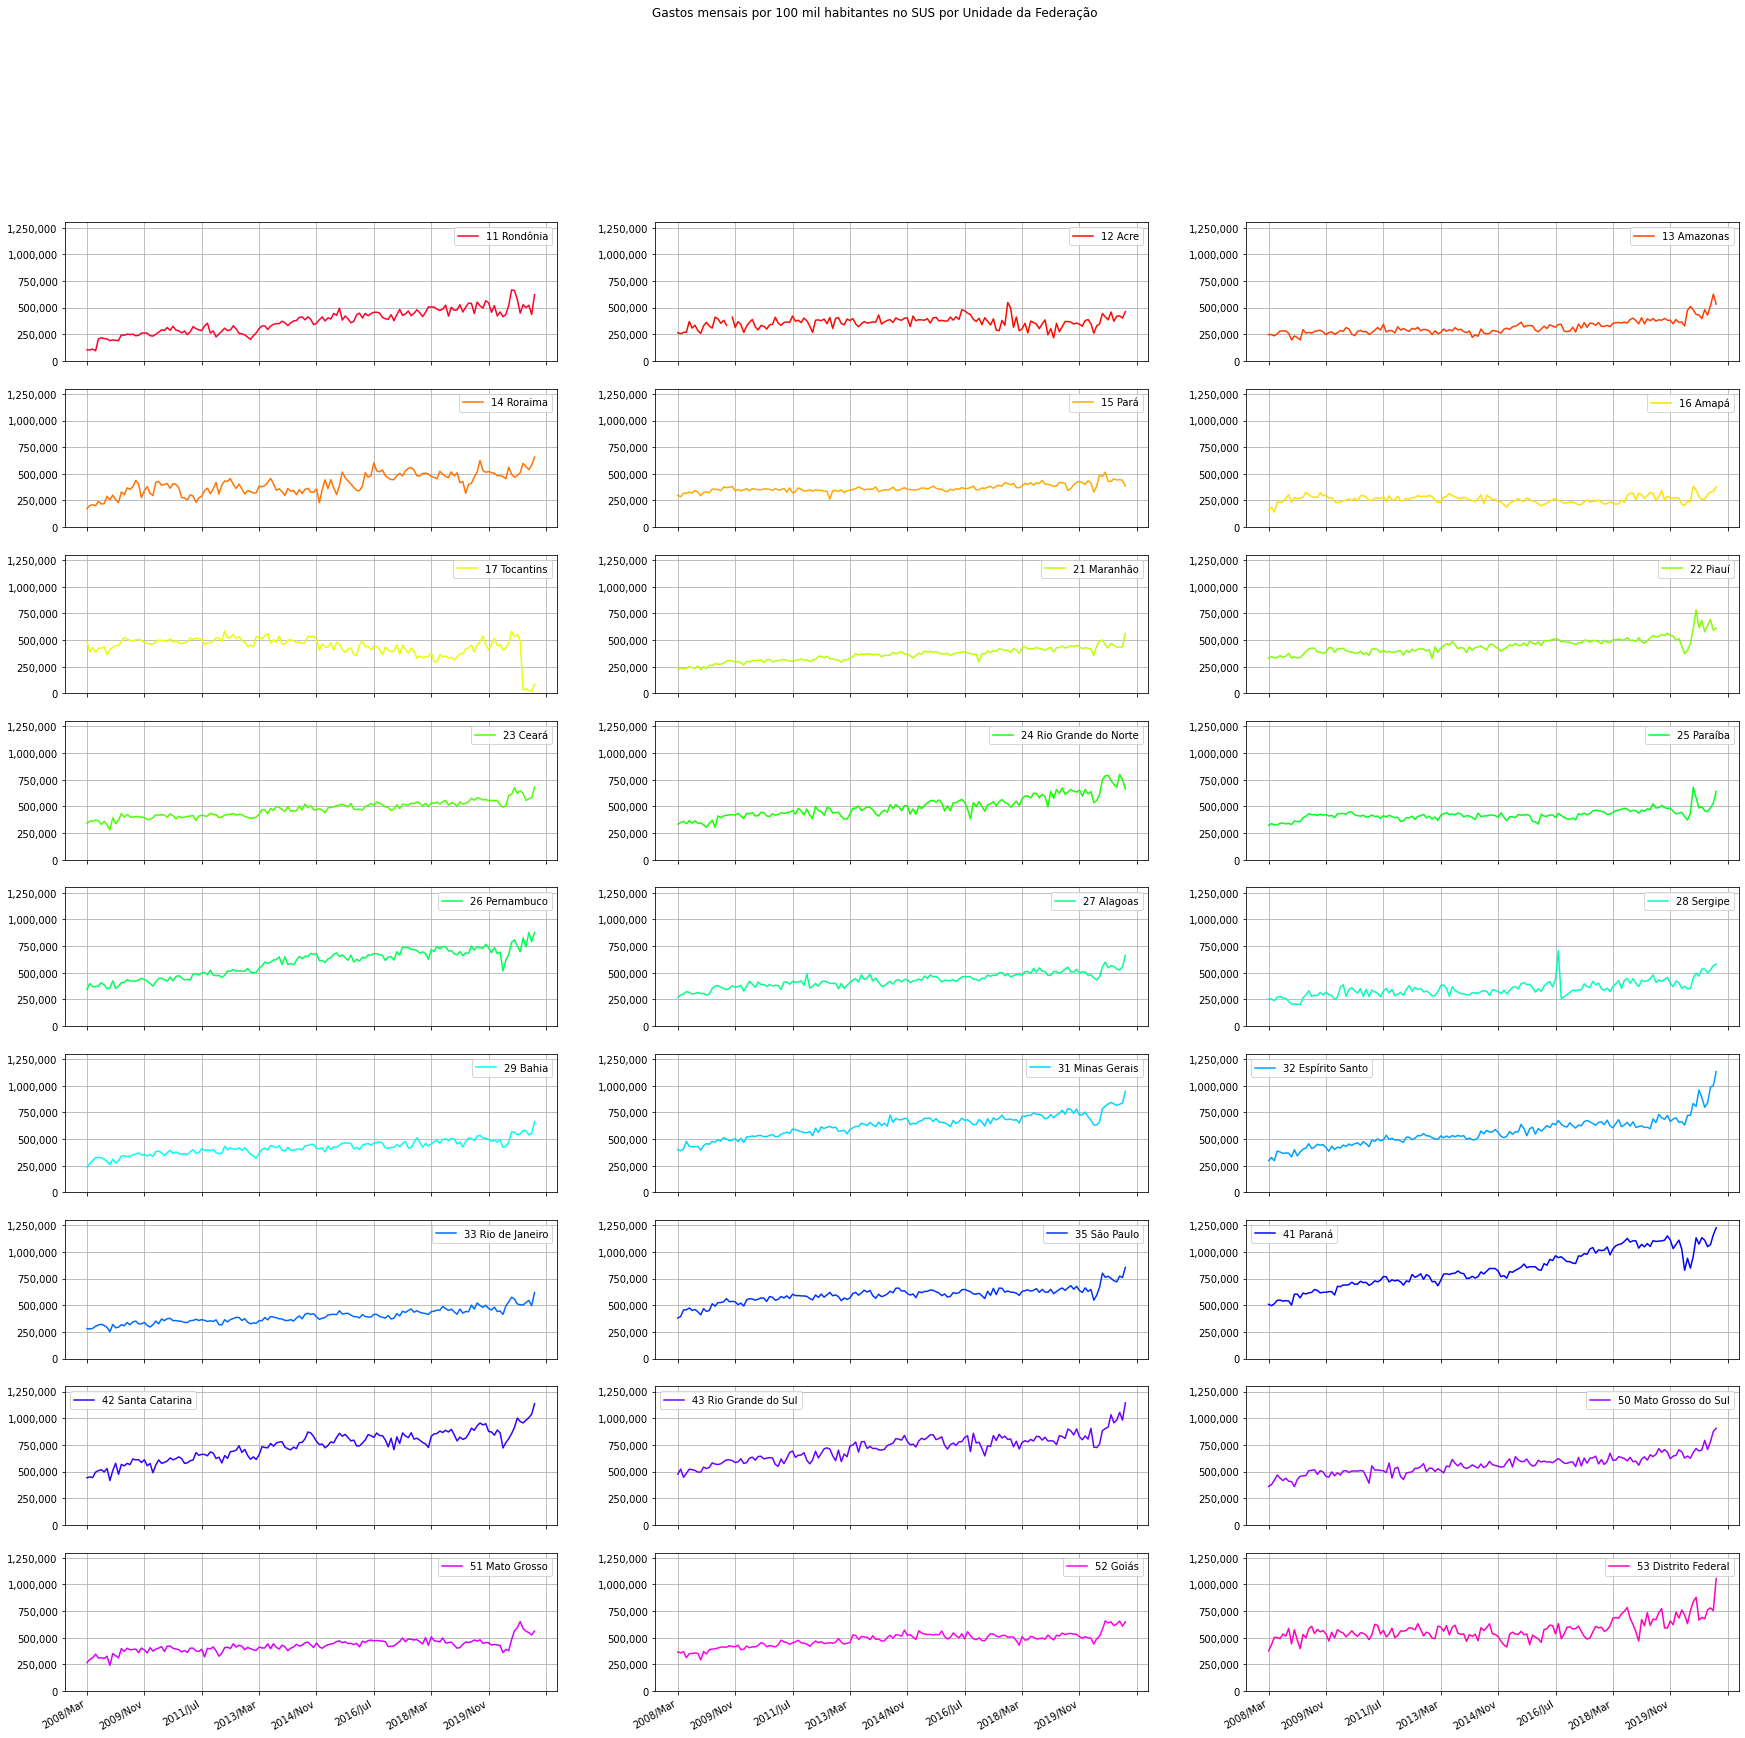

In [27]:
ax= gastos2.iloc[:,2:].T.plot(grid=True,figsize=(30,30),colormap="gist_rainbow",subplots=True,layout=(9,3),title="Gastos mensais por 100 mil habitantes no SUS por Unidade da Federação",ylim=(0,1.3*10**6))
for a in ax:
  for i in a:
    i.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

# Assim como nos gráficos anteriores são as UFs do Sul e Sudeste que possuem os maiores números (mais ou menos na faixa de 500 mil reais por 100 mil habitantes), enquanto os menores gastos são de UFs do Norte e Nordeste.

# Abaixo uma tabela com as médias de todo o período que ilustram o ponto.

In [28]:
gastos2.mean(axis=1).sort_values()

Unidade da Federação
16 Amapá                 261589.858
13 Amazonas              313294.717
28 Sergipe               347446.127
21 Maranhão              356009.421
12 Acre                  358817.258
11 Rondônia              365410.038
15 Pará                  365956.702
33 Rio de Janeiro        391700.711
14 Roraima               401057.749
29 Bahia                 416030.004
25 Paraíba               420118.708
51 Mato Grosso           422031.595
27 Alagoas               429437.885
17 Tocantins             439180.688
22 Piauí                 448019.457
23 Ceará                 468709.952
52 Goiás                 479867.000
24 Rio Grande do Norte   495388.183
32 Espírito Santo        558525.069
50 Mato Grosso do Sul    558824.004
53 Distrito Federal      575651.881
26 Pernambuco            582766.821
35 São Paulo             594439.994
31 Minas Gerais          622875.482
43 Rio Grande do Sul     720743.812
42 Santa Catarina        731133.385
41 Paraná                834703.785
dtype: 

# Para observar a correlação entre as duas variáveis fazemos um gráfico de dispersão dos pontos e o resultado é claro.

# UFs que, em média, gastaram mais por 100 mil habitantes no período tiveram, em média, mais óbitos por 100 mil habitantes.

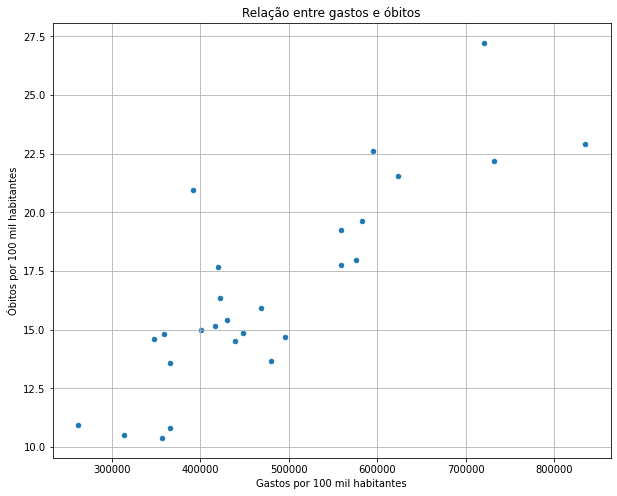

In [29]:
medias = pd.merge(gastos2.mean(axis=1).to_frame(),obitos.mean(axis=1).to_frame(),right_index=True,left_index=True)
medias.columns = ["gastos","obitos"]
medias.plot(kind="scatter",x="gastos",y="obitos",figsize=(10,8),grid=True)
plt.ylabel("Óbitos por 100 mil habitantes")
plt.xlabel("Gastos por 100 mil habitantes")
plt.title("Relação entre gastos e óbitos")
plt.show()

# Plotamos as séries de óbitos e gastos de todas UFs lado a lado investigar a correlação entre gastos e óbitos.

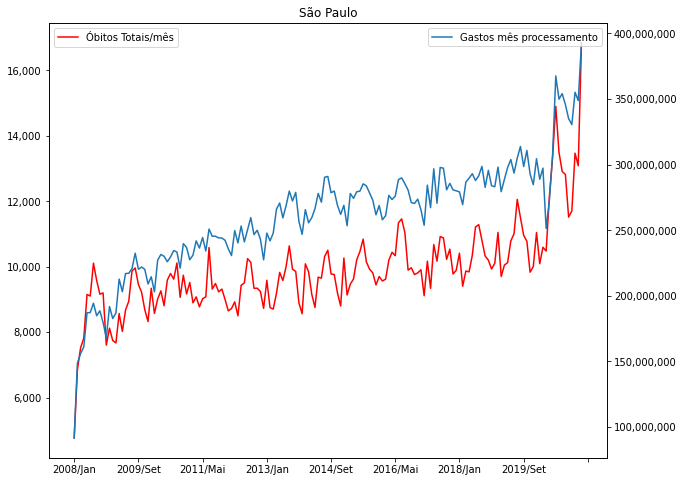

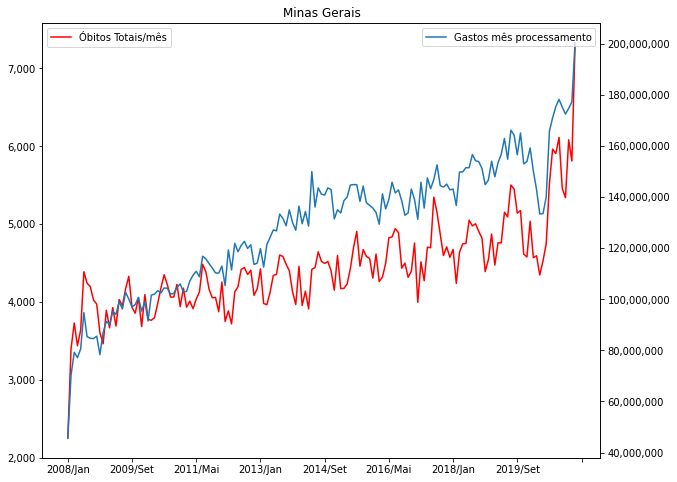

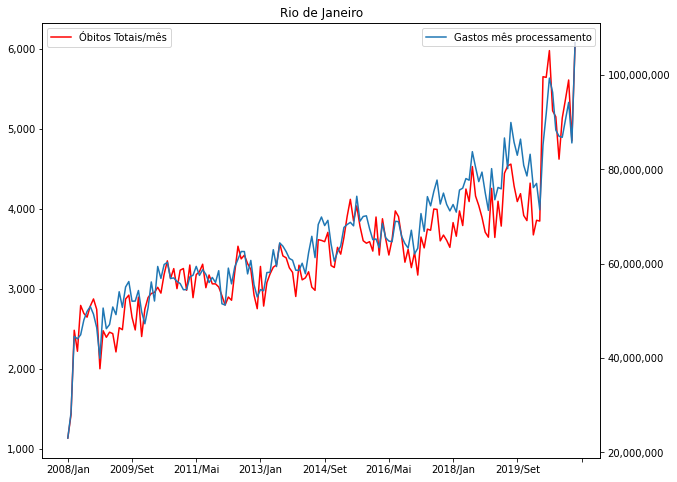

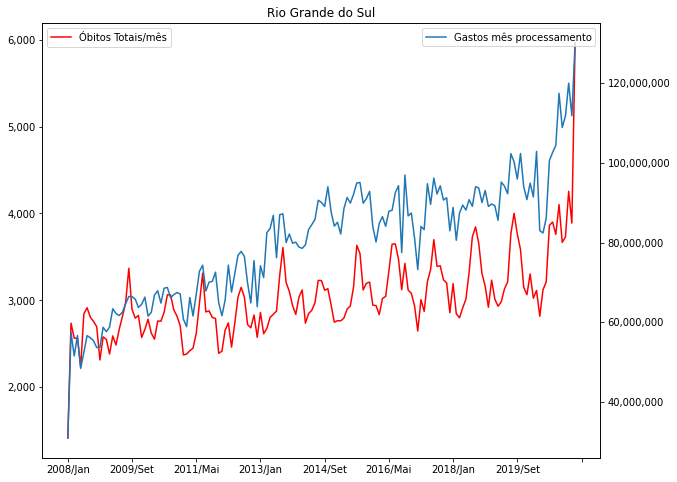

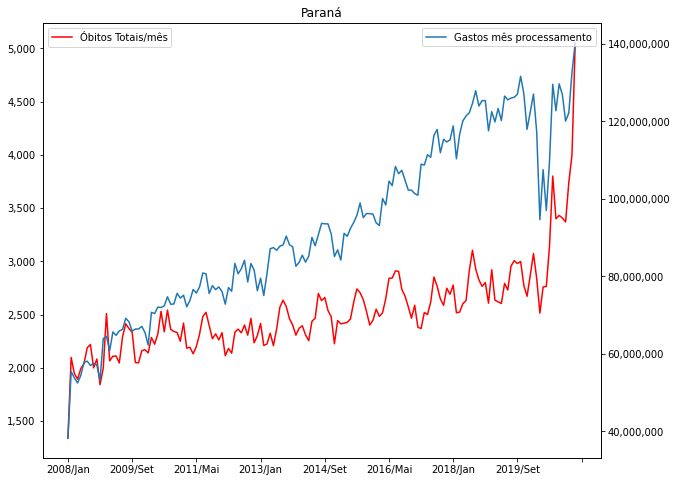

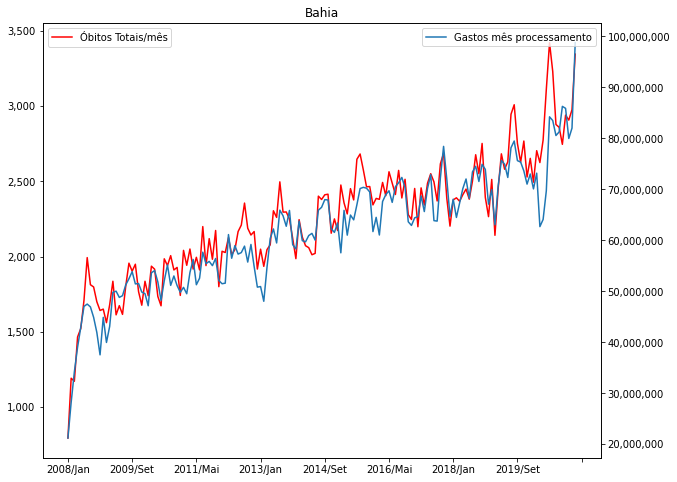

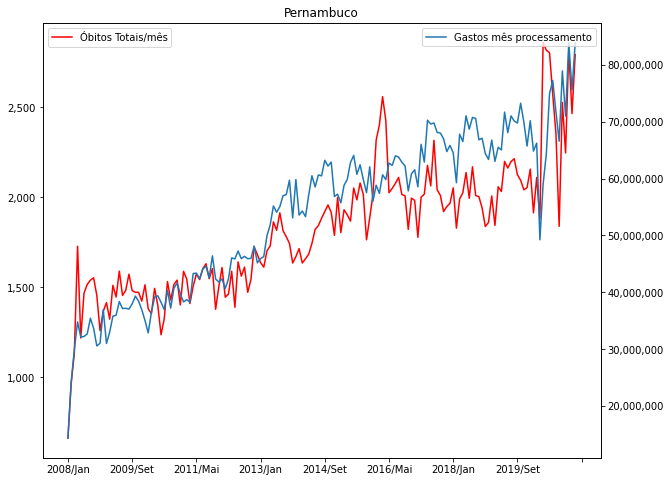

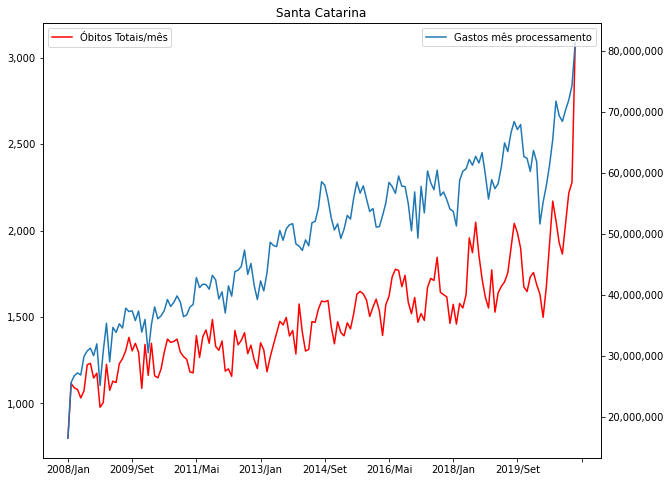

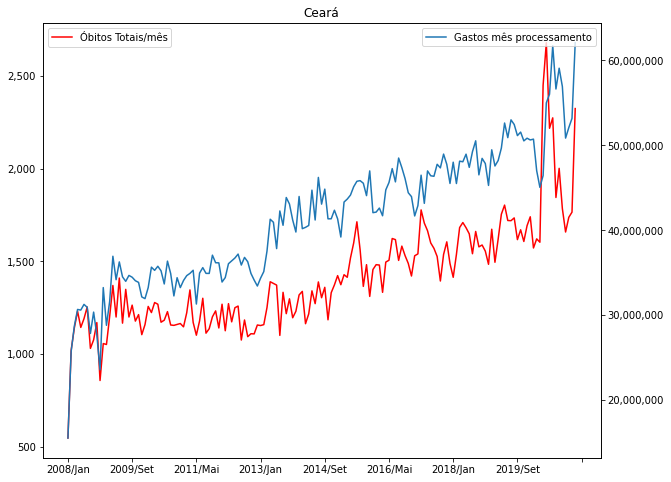

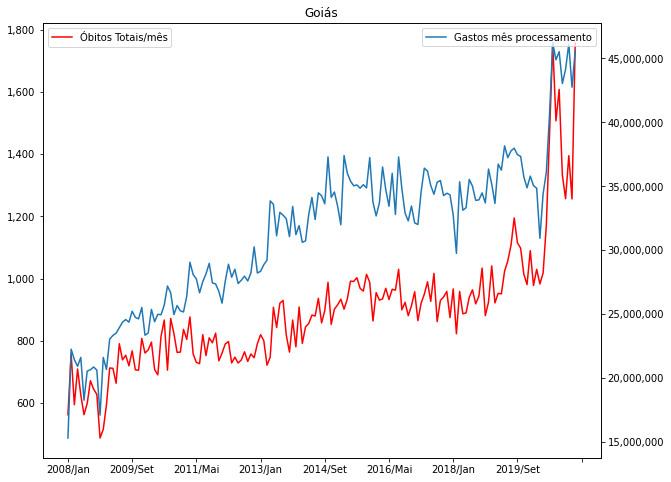

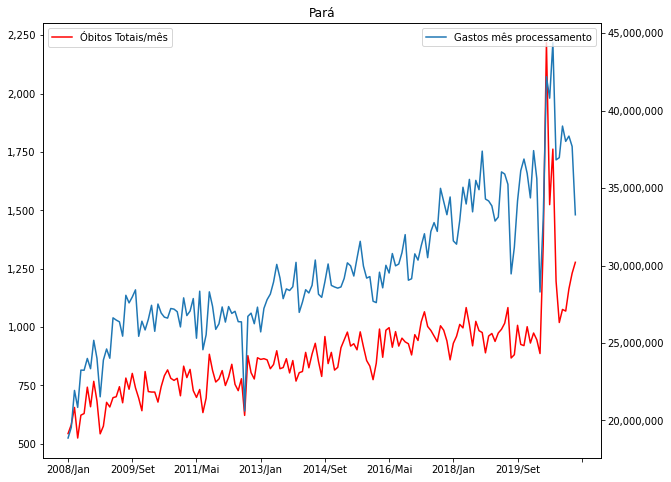

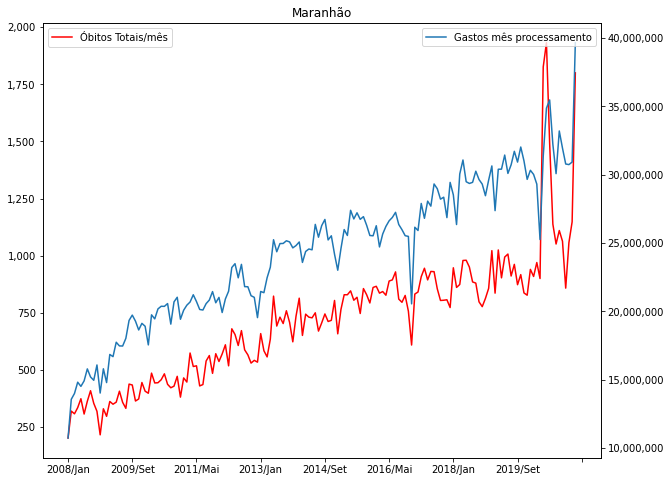

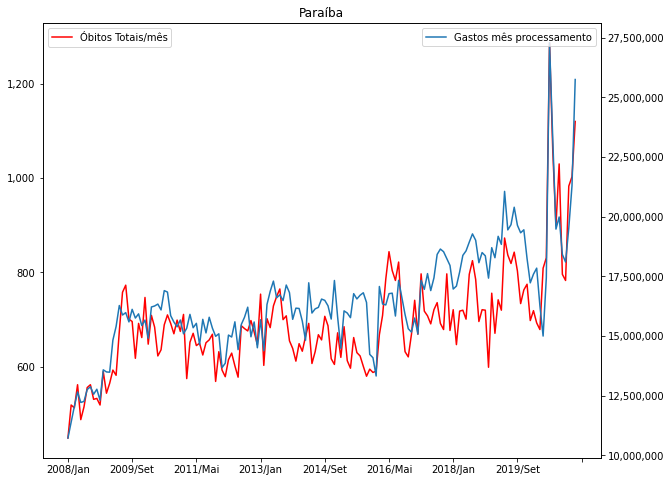

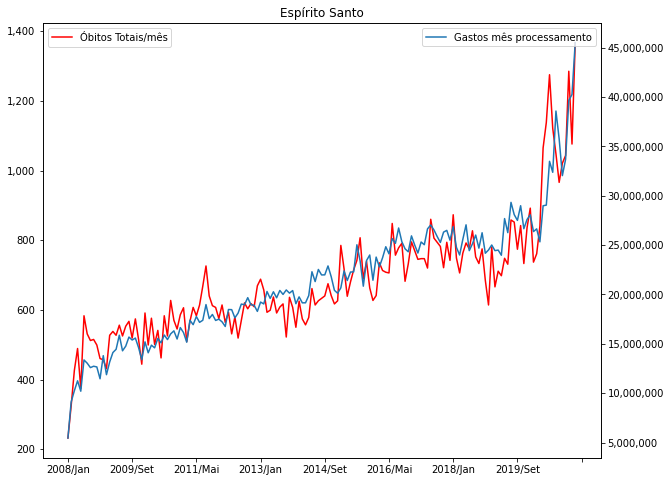

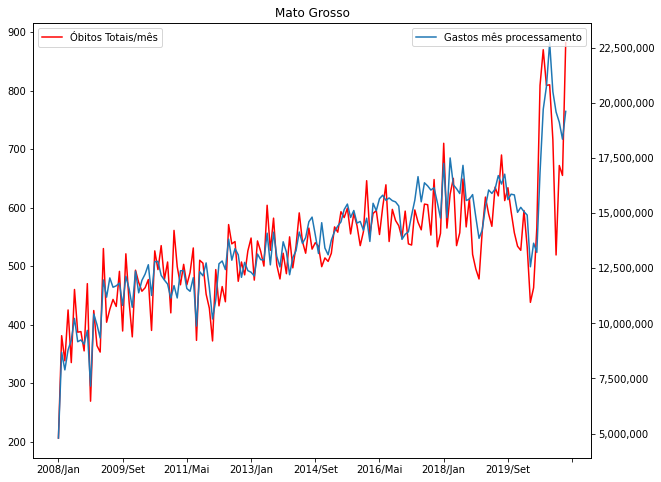

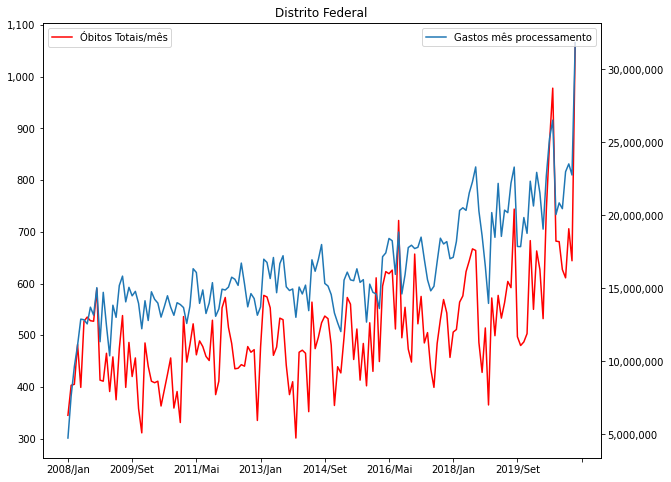

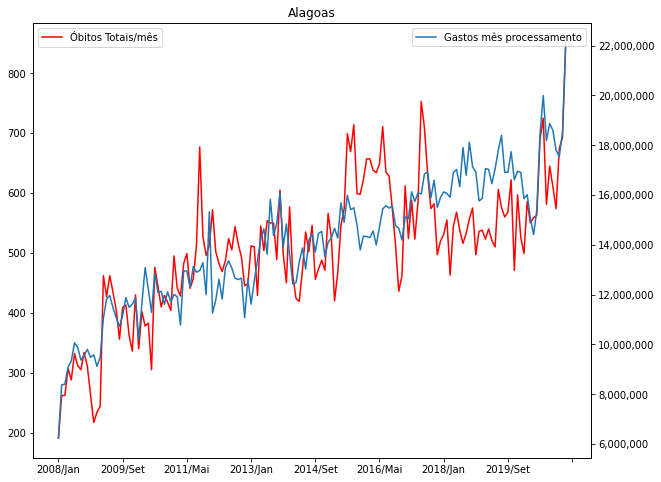

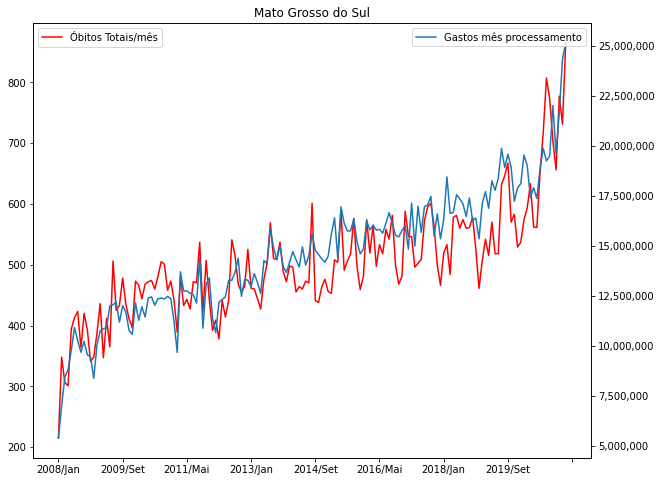

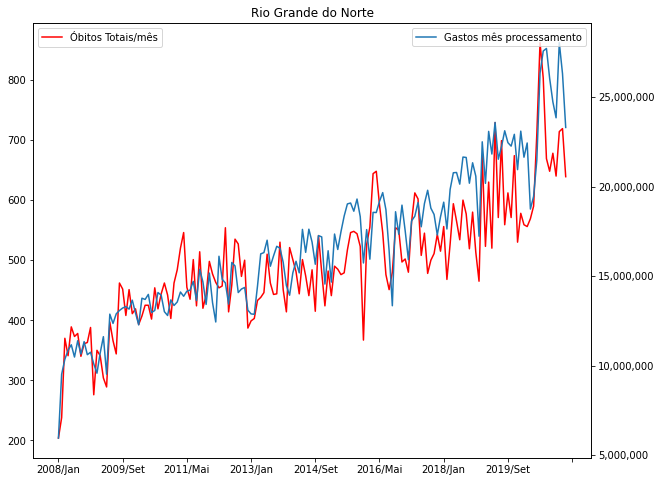

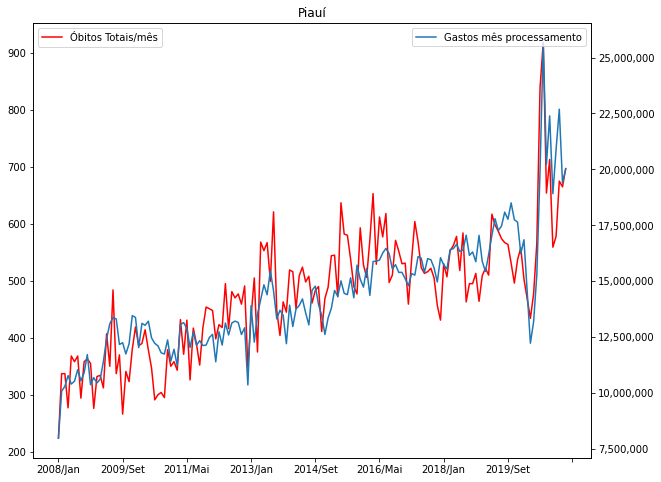

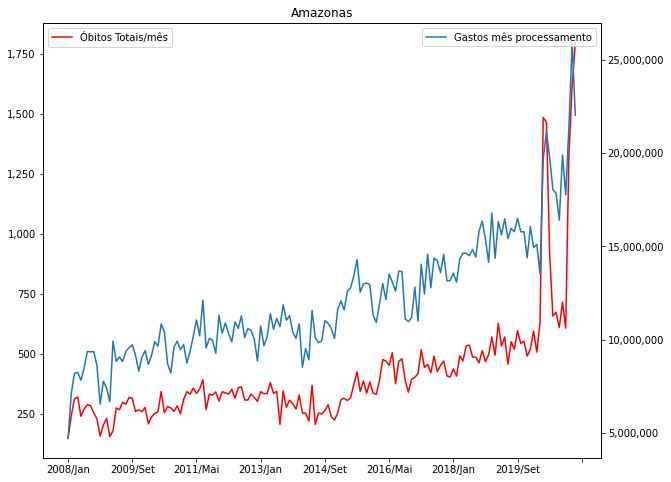

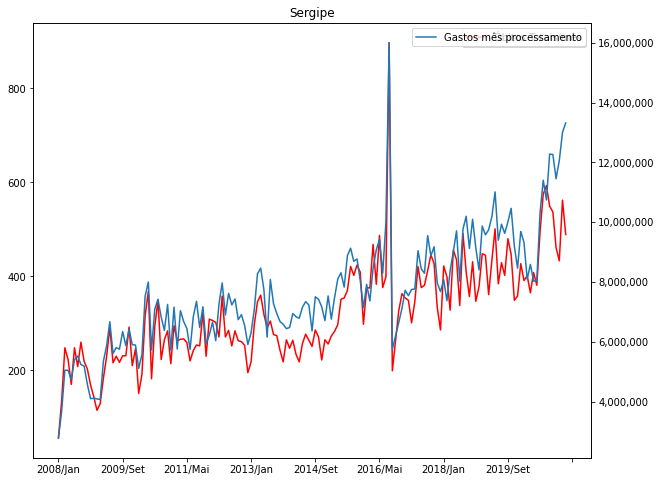

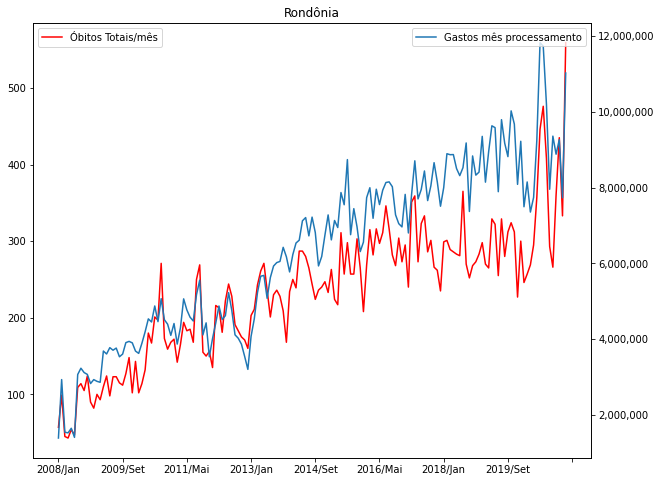

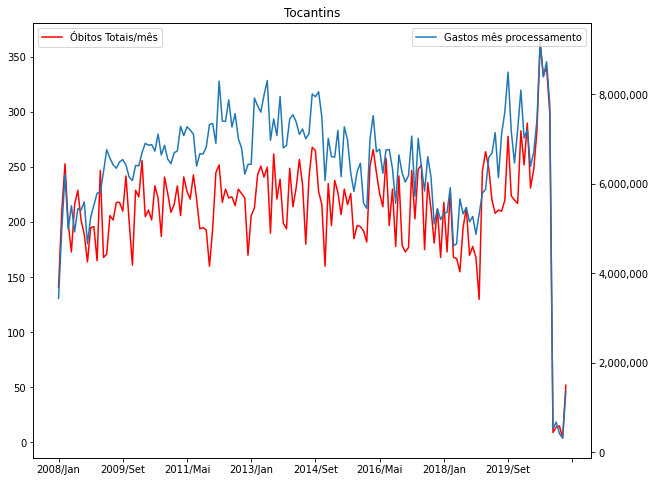

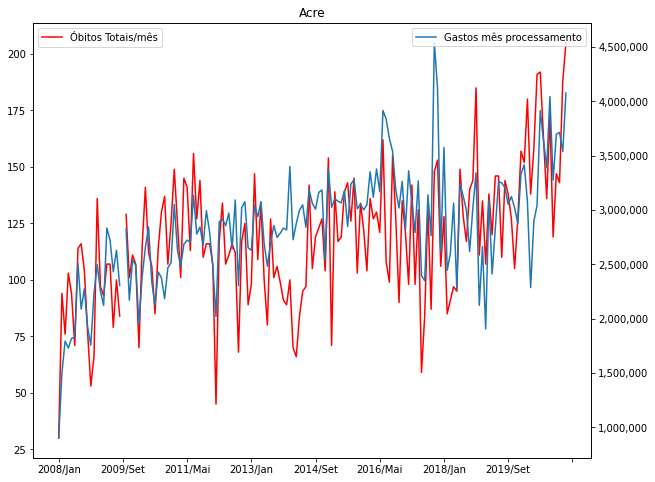

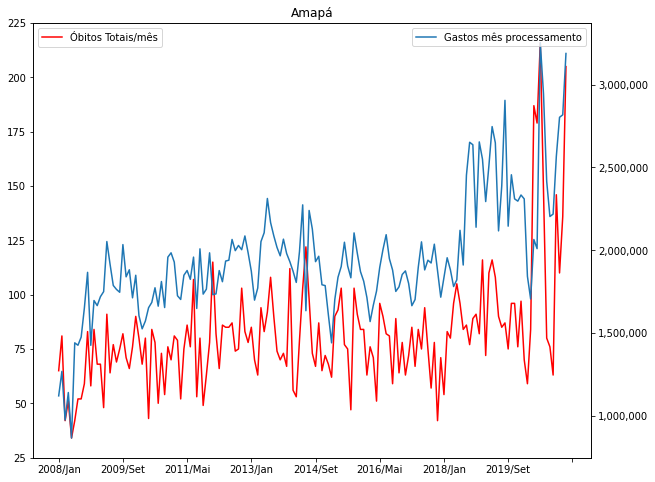

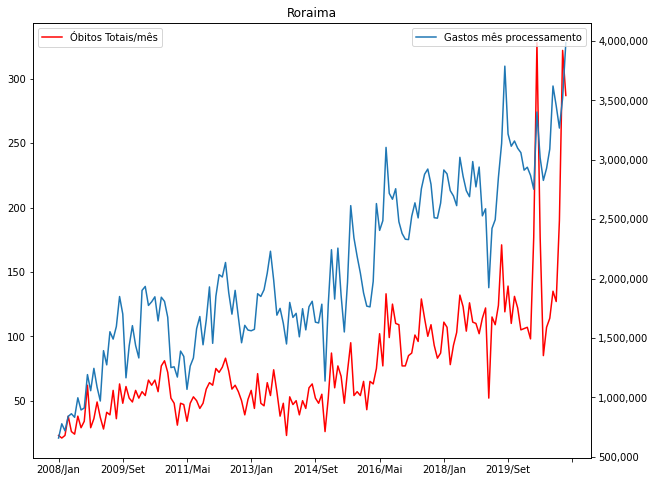

In [30]:
for coluna in df.T.columns:
  fig,ax =plt.subplots()
  df.T[coluna].plot(figsize=(10,8),color="r",ax=ax,label="Óbitos Totais/mês")
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
  ax2 = ax.twinx()
  gastos.T[coluna].plot(figsize=(10,8),ax=ax2,label="Gastos mês processamento")
  ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
  ax.set_title(coluna[3:])
  ax.legend()
  ax2.legend(loc=1)
  plt.show()

# É possível observar que na grande maioria dos casos as trajetórias das duas curvas é muito similar.

# Uma possível explicação é que isso é consequência de um maior número de pessoas internadas.
Mais pessoas internadas > Mais gastos

Mais pessoas internadas > Mais óbitos

# Conclusão

# Esse projeto teve como objetivo analisar os dados de óbitos por Unidade da Federação do DataSUS.

# Para podermos comparar diferentes UFs utilizamos dados populacionais que também foram obtidos no DataSUS.

# As UFs com menores números de óbitos por 100 mil habitantes eram do Norte e Nordeste.

# Utilizamos dados de gastos por mês de processamento para investigar se os menores números de óbitos eram consequências de maiores gastos.

# Os resultados apontaram que maiores gastos estavam relacionados a maiores óbitos.

# Isso foi contrário à hipótese que maiores investimentos (gastos) teriam como consequência uma menor quantidade de óbitos.

# Vale apontar que as análises possuem diversas limitações. Primeiramente, a forma com que os valores anuais de população foram transformados para dados mensais precisou de hipóteses irrealistas que podem ter comprometido as conclusões.

# Outro fator é que os óbitos computados pelo DataSUS são apenas de pacientes cujas internações que tiveram alta por óbito. Dados de hospitais particulares ou pessoas que morreram antes mesmo de chegar no hospital do SUS ou que não chegaram a ser internadas não estão incluídos na amostra. 

# Existe também o problema de subnotificação que pode ser o motivo dos melhores resultados terem sidos encontrados na Região Norte e Nordeste. 

# Vale apontar também que existem variações na estrutura demográfica e climática das UFs, fatores que estão além da análise apresentada.